# Interaction simulation

The aim of this simulation is to check whether violating the rare disease assumption affects the significance of interaction term in caseonly interaction association test.

# Setting

One pair of SNPs

$y\sim{binomial(p)}$

$logit(p) = b_{0}+b_{1}x_{1}+b_{2}x_{2}+b_{12}x_{1}x_{2}+b_{3}sex+b_{4}age+g+e$

$p = 1/(1+exp(-u))$

$log(p/(1-p))=u$

Let

$b1=0.5$

$b2=0.6$

$b12=0.5$

$b3=0.01$

$b4=0.001$

$p\approx 0.01$

$E(u)\approx logit(0.01)=-5.6$

$x_{1}, x_{2}\sim $ {0, 1 (4.9%), 2 (0.1%)}

In [6]:
log(0.01/0.99)

[1] -4.59512

In [8]:
# n = 1E05
# snp1 snp2
n=100000
snp1<-rep(0,n)
snp2<-rep(0,n)

set.seed(123)
list11<-sample(1:n,n/20)
snp1[list11]<-1
list12<-sample(list11,n/1000)
snp1[list12]<-2

set.seed(321)
list21<-sample(1:n,n/20)
snp2[list21]<-1
list22<-sample(list21,n/1000)
snp2[list22]<-2

# sex age
sex <- sample(0:1,n, replace =TRUE)
age <- runif(n,0,80)

# y
u <- 0.5*snp1+0.6*snp2+0.5*snp1*snp2+0.1*sex+0.01*age-5.2
p <- 1/(1+exp(-u))
y <- rbinom(n,1,p)

# GLM
model <- glm(y~snp1+snp2+snp1*snp2,family = "binomial")
summary(model)


Call:
glm(formula = y ~ snp1 + snp2 + snp1 * snp2, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5448  -0.1289  -0.1289  -0.1289   3.0967  

Coefficients:
            Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -4.78650    0.03665 -130.608  < 2e-16 ***
snp1         0.47343    0.12542    3.775  0.00016 ***
snp2         0.60946    0.11705    5.207 1.92e-07 ***
snp1:snp2    0.63070    0.31208    2.021  0.04328 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10224  on 99999  degrees of freedom
Residual deviance: 10169  on 99996  degrees of freedom
AIC: 10177

Number of Fisher Scoring iterations: 7


In [9]:
mean(p)

[1] 0.009536894

In [10]:
table(sex)

sex
    0     1 
50134 49866 

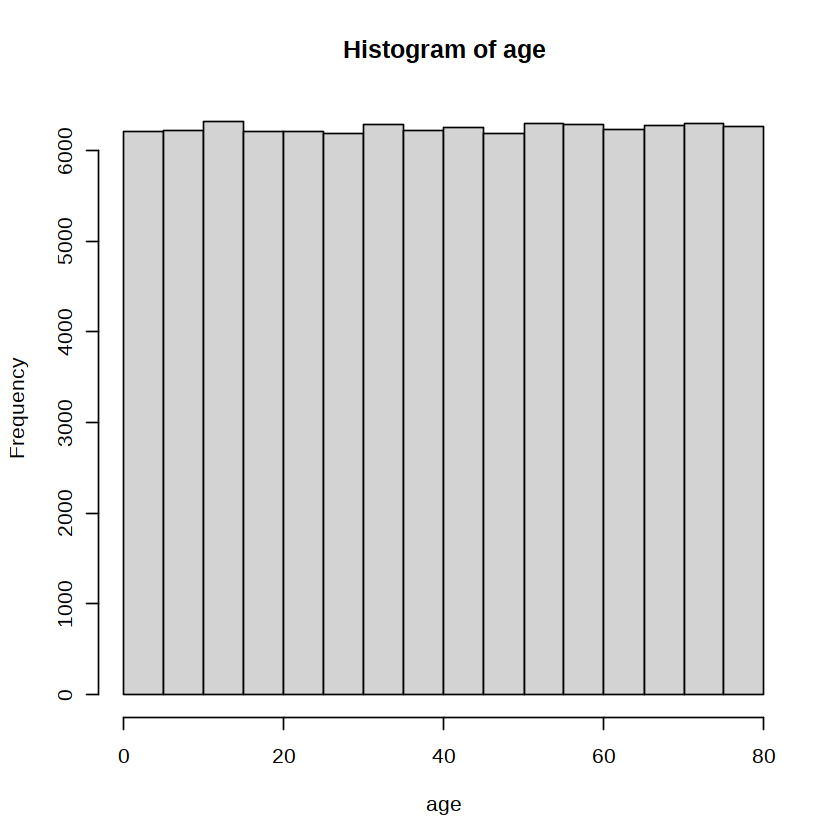

In [11]:
hist(age)

It's hard to keep the banlance between the AF, disease prevelence and the significance of the interaction term (the power to test the interaction term)

In [12]:
# Build the ped and map file for this dataset
first6 <- read.table("~/project/guangyou/interaction/f3393.x.raw.first6col",header=TRUE)
first6[1:5,]

,FID,IID,PAT,MAT,SEX,PHENOTYPE
,<int>,<int>,<int>,<int>,<int>,<int>
1,1000019,1000019,0,0,2,-9
2,1000022,1000022,0,0,1,-9
3,1000035,1000035,0,0,1,-9
4,1000046,1000046,0,0,2,-9
5,1000054,1000054,0,0,2,-9


In [13]:
df <- cbind(first6[1:n,],snp1,snp2)
df$SEX <- sex
df[1:5,]

,FID,IID,PAT,MAT,SEX,PHENOTYPE,snp1,snp2
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1000019,1000019,0,0,0,-9,0,0
2,1000022,1000022,0,0,1,-9,0,0
3,1000035,1000035,0,0,1,-9,0,0
4,1000046,1000046,0,0,0,-9,0,0
5,1000054,1000054,0,0,0,-9,1,0


In [14]:
tail(df)

,FID,IID,PAT,MAT,SEX,PHENOTYPE,snp1,snp2
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
99995,2033400,2033400,0,0,1,-9,0,0
99996,2033417,2033417,0,0,0,-9,0,0
99997,2033426,2033426,0,0,1,-9,0,0
99998,2033432,2033432,0,0,1,-9,0,0
99999,2033444,2033444,0,0,0,-9,0,0
100000,2033458,2033458,0,0,1,-9,0,0


In [18]:
snp1[snp1==0]="G G"
snp1[snp1==1]="G A"
snp1[snp1==2]="A A"
snp2[snp2==0]="G G"
snp2[snp2==1]="G A"
snp2[snp2==2]="A A"
df <- cbind(first6[1:n,],snp1,snp2)
df$SEX <- sex
df[1:5,]

,FID,IID,PAT,MAT,SEX,PHENOTYPE,snp1,snp2
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,1000019,1000019,0,0,0,-9,G G,G G
2,1000022,1000022,0,0,1,-9,G G,G G
3,1000035,1000035,0,0,1,-9,G G,G G
4,1000046,1000046,0,0,0,-9,G G,G G
5,1000054,1000054,0,0,0,-9,G A,G G


In [19]:
tail(df)

,FID,IID,PAT,MAT,SEX,PHENOTYPE,snp1,snp2
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
99995,2033400,2033400,0,0,1,-9,G G,G G
99996,2033417,2033417,0,0,0,-9,G G,G G
99997,2033426,2033426,0,0,1,-9,G G,G G
99998,2033432,2033432,0,0,1,-9,G G,G G
99999,2033444,2033444,0,0,0,-9,G G,G G
100000,2033458,2033458,0,0,1,-9,G G,G G


In [20]:
write.table(df,"/home/gl2776/working/interaction/simulation/simulation.ped",sep="\t",col.names=FALSE,row.names=FALSE,quote=FALSE)

In [28]:
# Give a random map
f<-file("/home/gl2776/working/interaction/simulation/simulation.map")
writeLines(c("1 snp1 0 6036089","22 snp2 0 22670862"), f)
close(f)

In [15]:
# Phenotype
phe <- cbind(first6[1:n,1:2],y,sex,age)
write.table(phe,"/home/gl2776/working/interaction/simulation/simulation.phe",sep="\t",col.names=TRUE,row.names=FALSE,quote=FALSE)
phe[1:5,]

,FID,IID,y,sex,age
,<int>,<int>,<int>,<int>,<dbl>
1,1000019,1000019,0,0,66.831761
2,1000022,1000022,0,1,69.151683
3,1000035,1000035,0,1,20.539669
4,1000046,1000046,0,0,6.325829
5,1000054,1000054,0,0,21.119993


In [16]:
# Case only Phenotype
phe <- cbind(first6[1:n,1:2],y,sex,age,snp1,snp2)
phe <- phe[phe$y==1,]
write.table(phe,"/home/gl2776/working/interaction/simulation/simulation.caseonly.phe",sep="\t",col.names=TRUE,row.names=FALSE,quote=FALSE)
phe[1:5,]

,FID,IID,y,sex,age,snp1,snp2
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
145,1001508,1001508,1,1,66.804488,0,0
255,1002643,1002643,1,0,62.372254,0,0
469,1004839,1004839,1,0,9.919158,0,0
474,1004882,1004882,1,1,60.444116,1,0
534,1005500,1005500,1,1,76.082388,0,0


In [17]:
dim(phe)

[1] 895   7